In [1]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
monkeys_images = []
for file in os.listdir():
    if (file.startswith('monkey') and file.split('.')[0][-1].isdigit() ):
        monkeys_images.append(file)

In [3]:
monkey_imgs = []
for mk_img in monkeys_images:
    mky = cv2.imread(mk_img,cv2.COLOR_BGR2GRAY)
    mky = mky.astype(np.float32)
    monkey_imgs.append( mky.mean(axis=2) )

In [4]:
def random_crop(image, output_size = (120, 120) , maintain_aspect_ratio=True):
    # Get the dimensions of the input image
    height, width = image.shape[:2]

    if maintain_aspect_ratio:
        # Calculate the maximum valid crop position considering the aspect ratio
        max_x = width - output_size[1]
        max_y = height - output_size[0]

        if max_x < 0 or max_y < 0:
            raise ValueError("Output size is larger than the input image")

        # Generate a random crop position within the valid range
        x = random.randint(0, max_x)
        y = random.randint(0, max_y)
    else:
        # Generate random crop positions without considering the aspect ratio
        x = random.randint(0, width - output_size[1])
        y = random.randint(0, height - output_size[0])

    cropped_image = image[y:y + output_size[0], x:x + output_size[1]]

    return cropped_image

In [5]:
transformed_monkeys = [random_crop(mk_img) for mk_img in monkey_imgs]

In [6]:
monkey_feature_map = cv2.imread('monkey features.png',cv2.COLOR_BGR2GRAY)

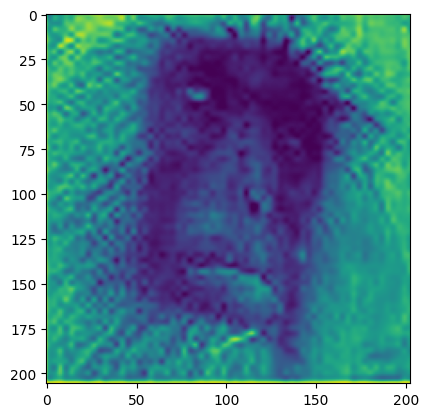

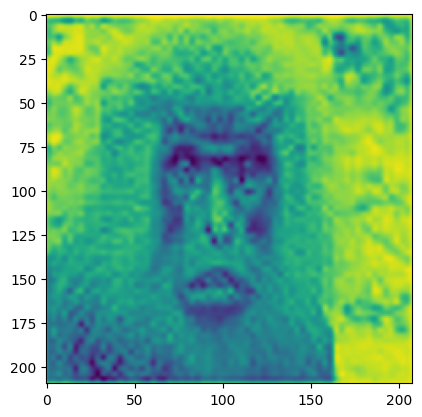

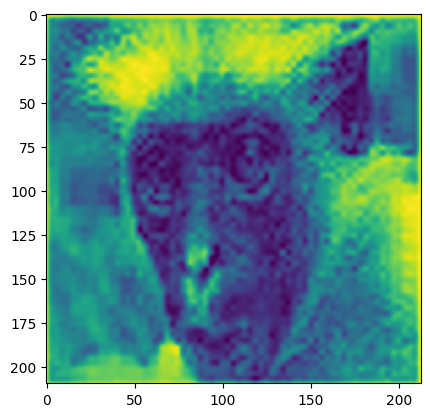

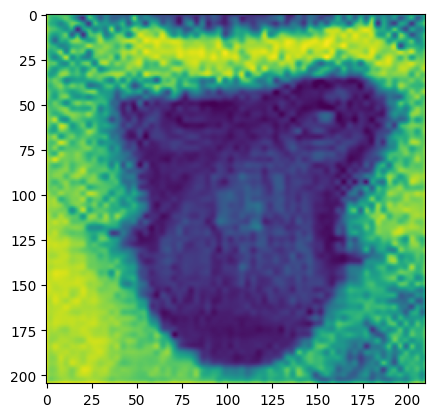

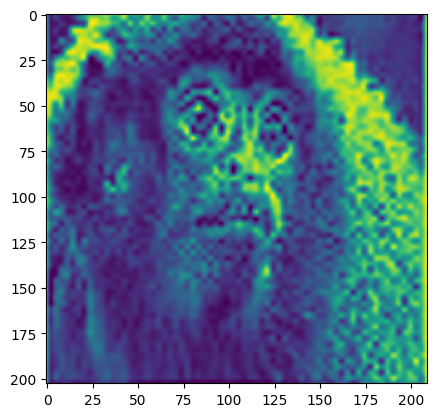

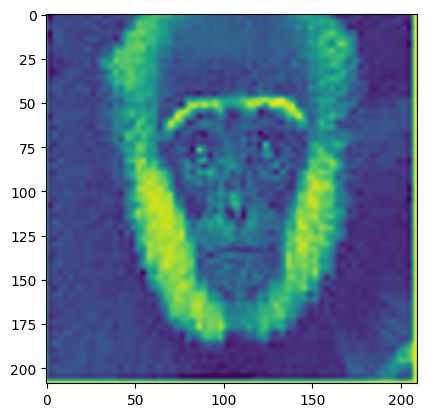

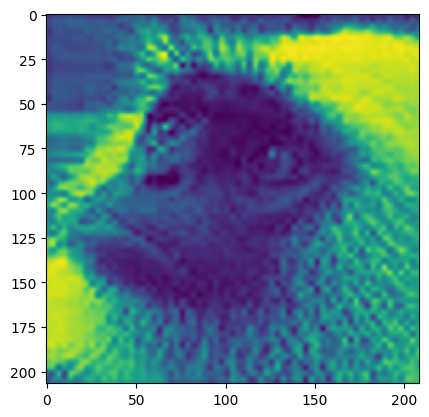

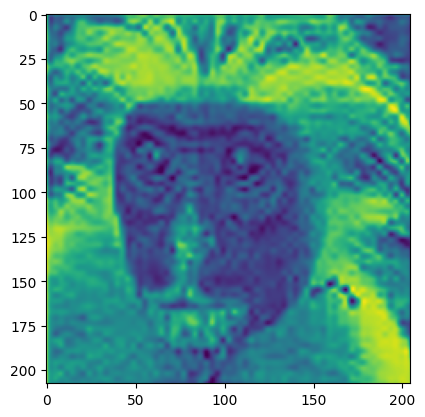

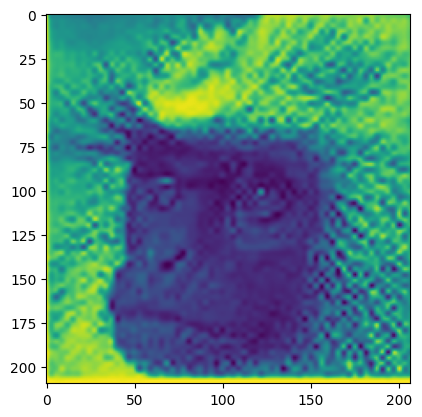

In [7]:
for monkey in monkey_imgs:
    plt.imshow(monkey)
    plt.show()
    del monkey

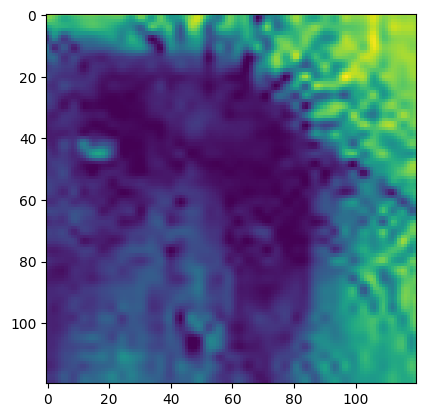

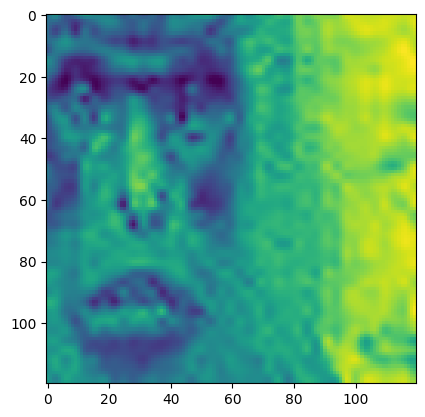

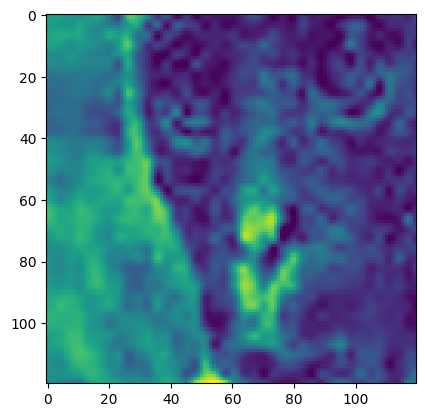

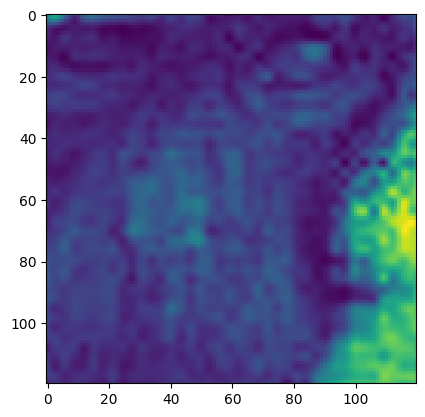

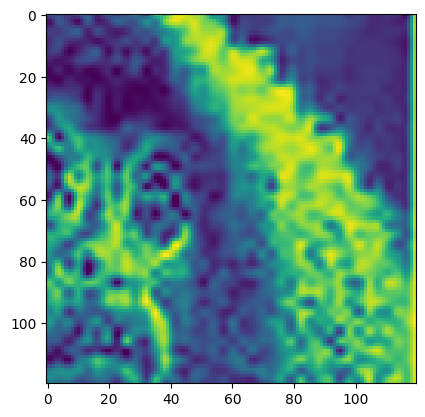

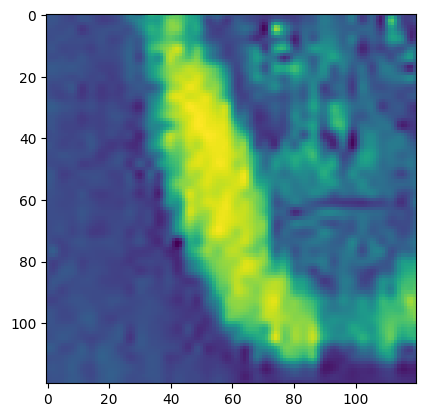

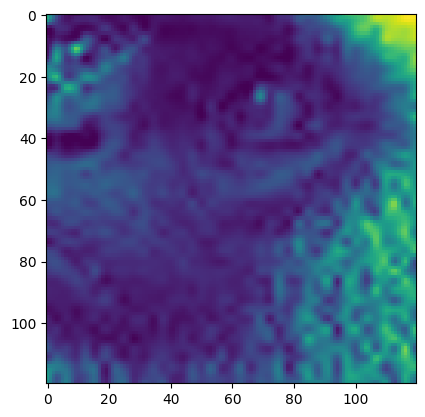

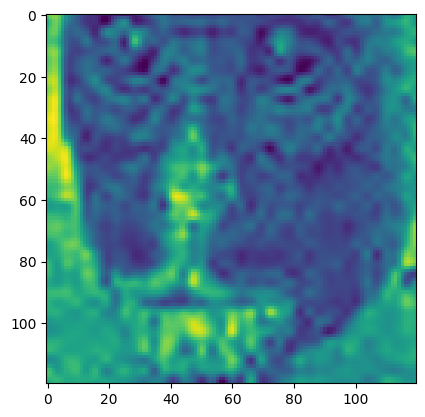

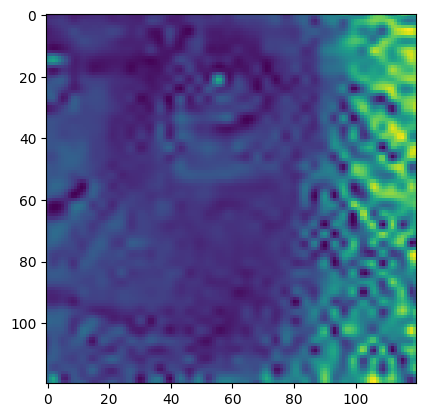

In [8]:
for monkey in transformed_monkeys:
    plt.imshow(monkey)
    plt.show()
    del monkey

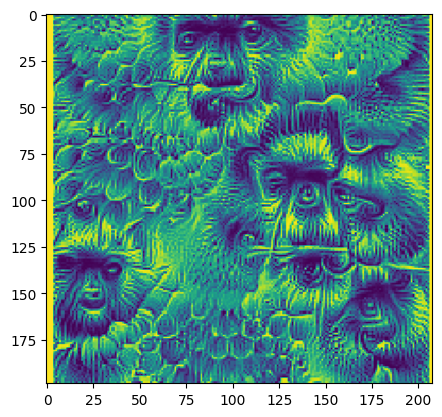

In [9]:
monkey_feature_map = monkey_feature_map.mean(axis=2)
monkey_feature_map = monkey_feature_map.astype(np.float32)
plt.imshow(monkey_feature_map)

In [10]:
cv2.

SyntaxError: invalid syntax (3272484039.py, line 1)

In [ ]:
for i in range(len(transformed_monkeys)):
    img = cv2.resize(monkey_imgs[i],(120,120))
    res = cv2.matchTemplate(img,monkey_feature_map,cv2.TM_CCORR_NORMED)
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
    ax1.imshow(monkey_feature_map,cmap='RdYlGn')
    ax2.imshow(img,cmap='RdYlGn')
    ax3.imshow(res,cmap='RdYlGn')

In [ ]:
for i in range(len(transformed_monkeys)):
    res = cv2.matchTemplate(transformed_monkeys[i],monkey_feature_map,cv2.TM_CCOEFF_NORMED)
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=False)
    ax1.imshow(monkey_feature_map)
    ax2.imshow(transformed_monkeys[i])
    ax3.imshow(res)